In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import sys, os, glob, time, warnings, gc

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
field = 'south' # Arjun's fits are for DECam

In [6]:
# Apply GAIA-LS transformation
from scipy.interpolate import interp1d
transform_interp = {}
for band in ['g', 'r', 'z']:
    if field=='north':
        tmp = Table.read('../data/gaia_bassmzls_transform.txt', format='ascii.commented_header')
    else:
        tmp = Table.read('../data/gaia_decals_transform.txt', format='ascii.commented_header')
    transform_interp[band] = interp1d(tmp['bp_rp'], tmp['ls_'+band], bounds_error=False, fill_value='extrapolate', kind='linear')

0 g


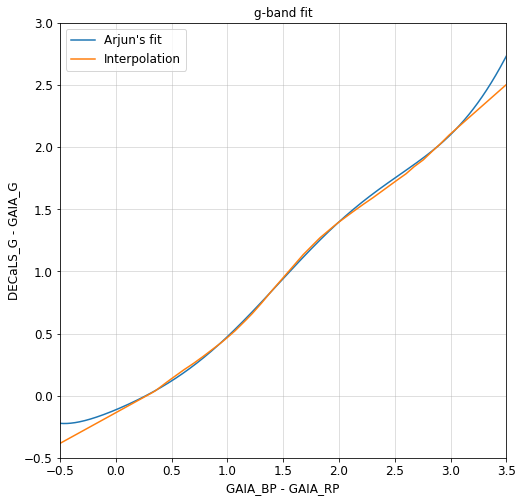

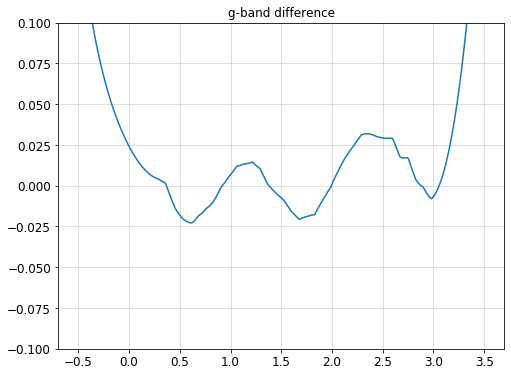

1 r


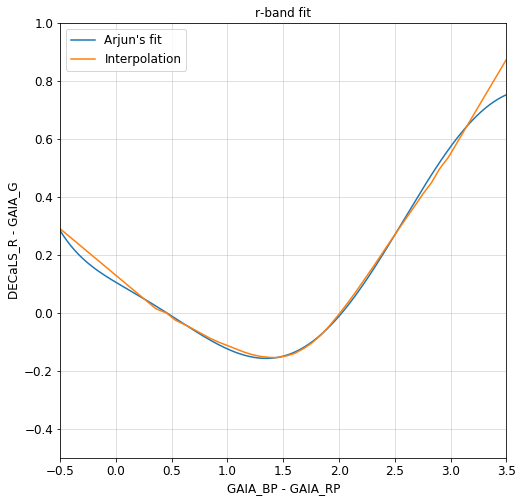

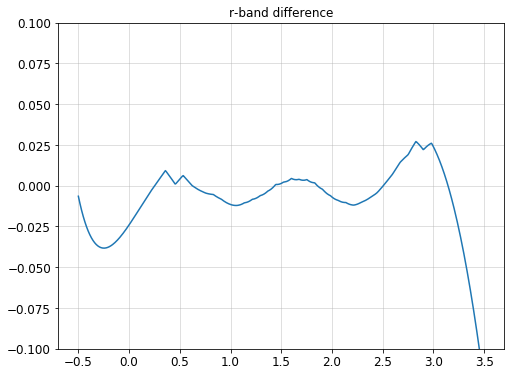

2 z


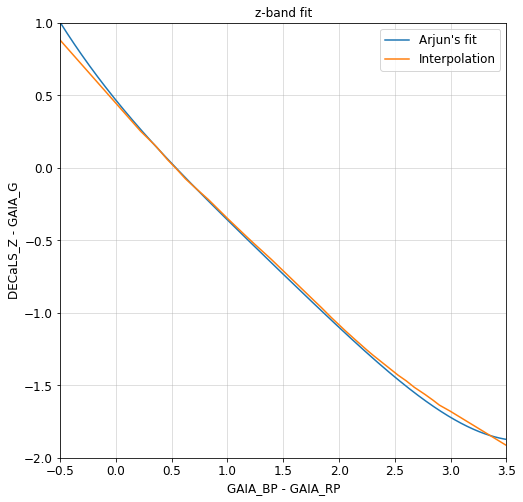

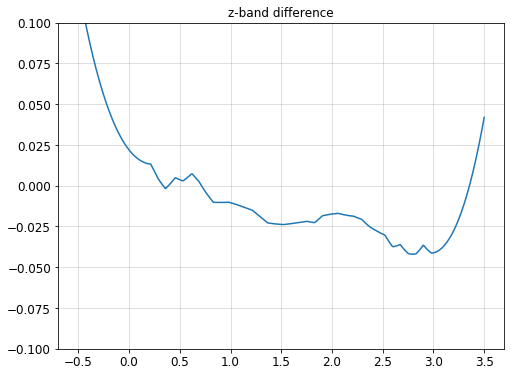

In [9]:
poly_coeff_all = [[-0.11368, 0.37504, 0.17344,-0.08107, 0.28088,-0.21250, 0.05773,-0.00525],
                 [ 0.10533,-0.22975, 0.06257,-0.24142, 0.24441,-0.07248, 0.00676],
                 [ 0.46744,-0.95143, 0.19729,-0.08810, 0.01566]]

axis_list = [[-0.5, 3.5, -0.5, 3.],
            [-0.5, 3.5, -0.5, 1.],
            [-0.5, 3.5, -2, 1.]]

for index, band in enumerate(['g', 'r', 'z']):
    
    print(index, band)
        
    coeff = np.array(poly_coeff_all[index])[::-1]
    poly = np.poly1d(coeff)

    x = np.linspace(axis_list[index][0], axis_list[index][1], 500)

    plt.figure(figsize=(8, 8))
    plt.plot(x, poly(x), label='Arjun\'s fit')
    plt.plot(x, transform_interp[band](x), label='Interpolation')
    plt.xlabel('GAIA_BP - GAIA_RP')
    plt.ylabel('DECaLS_{} - GAIA_G'.format(str.upper(band)))
    plt.grid(alpha=0.5)
    plt.axis(axis_list[index])
    plt.title(band+'-band fit')
    plt.legend()
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(x, poly(x)-transform_interp[band](x))
    plt.ylim(-0.1, 0.1)
    plt.grid(alpha=0.5)
    plt.title(band+'-band difference')
    plt.show()